In [19]:
import numpy as np

R1, R2, R3, R4 = 1, 1, 1, 1
V1 = 5
V2 = 10

A = np.array ([[-R1, -R2, 0, 0],  # Kirchoff Loop
               [R1, 0, R3, 0],    # Kirchoff Loop
               [0, R2, 0, R4],    # Kirchoff Loop
               [1, -1, -1, 1]])   # Kirchoff Junction
b = np.array ([[V1], [-V2], [V2], [0]]) 

x = np.linalg.solve(A,b)  # Solving for x in Ax = b

print(x)

[[-7.5]
 [ 2.5]
 [-2.5]
 [ 7.5]]


In [3]:
import numpy as np

R1, R2, R3, R4 = 1, 1, 1, 1
V = 5

A_Matrix = np.array ([
    [R1, 0, 0, 0, 0, R1, 0, 0, R4],
    [0, R2, 0, R4, 0, 0, 0, R2, 0],
    [0, 0, R3, R4, R4, 0 ,R3, 0, R4],
    [R1, 0, 0, 0, R4, 0, 0, R2, 0],
    [0, 0, R4, R4, 0, R4, 0, 0, R4],
    [1, 0, 1, 0, -1, -1, 0, 0, 0],
    [0, 1, 0, 1, 0, -1, -1, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, -1, -1],
    [0, -1, -1, 1, 0, 0, 0, 0, 0]])

B_matrix = np.array([[V], [V], [V], [V], [V], [0], [0], [0], [0]])

d = np.linalg.solve(A_Matrix,B_matrix)  # Solving for x in Ax = b

print(d)

[[2.        ]
 [1.14285714]
 [0.42857143]
 [1.57142857]
 [0.71428571]
 [1.71428571]
 [1.        ]
 [2.28571429]
 [1.28571429]]


In [6]:
2 + 1.57142857 == 1.28571429 + 2.28571429

False

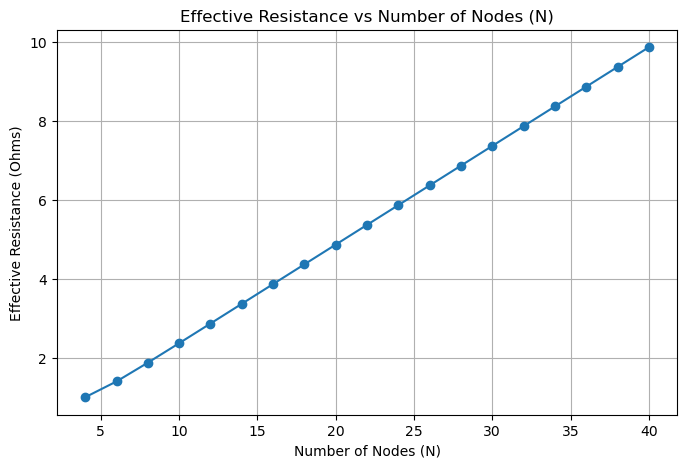

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def resistor_network(N, R1, R2, R3, R4):
    """
    Constructs the matrix A and vector b for the resistor network using Kirchhoff's laws.
    N must be even. R1, R2 are horizontal; R3, R4 are vertical resistors.
    """
    assert N % 2 == 0, #N must be even for a symmetrical ladder network."

    A = np.zeros((N, N))
    b = np.zeros(N)

    for i in range(N):
        # Even index (top rail)
        if i % 2 == 0:
            if i > 0:
                A[i, i] += 1/R1
                A[i, i-2] -= 1/R1
            if i < N - 2:
                A[i, i] += 1/R1
                A[i, i+2] -= 1/R1
            A[i, i] += 1/R4
            A[i, i+1] -= 1/R4
        # Odd index (bottom rail)
        else:
            if i > 1:
                A[i, i] += 1/R2
                A[i, i-2] -= 1/R2
            if i < N - 1:
                A[i, i] += 1/R2
                A[i, i+2] -= 1/R2
            A[i, i] += 1/R3
            A[i, i-1] -= 1/R3

    # Boundary conditions
    A[0, :] = 0
    A[0, 0] = 1
    b[0] = 1  # V+ = 1 V

    A[-1, :] = 0
    A[-1, -1] = 1
    b[-1] = 0  # Ground

    return A, b

def compute_effective_resistance(N, R1, R2, R3, R4):
    A, b = resistor_network(N, R1, R2, R3, R4)
    V = np.linalg.solve(A, b)
    # Current flowing into the network from V+
    I = (V[0] - V[2]) / R1 + (V[0] - V[1]) / R3
    return 1 / I

print(compute_effective_resistance(4,1,1,1,1))
print(5/

# Test for increasing N
Ns = np.arange(4, 42, 2)
resistances = [compute_effective_resistance(N, 1, 1, 1, 1) for N in Ns]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(Ns, resistances, marker='o')
plt.title("Effective Resistance vs Number of Nodes (N)")
plt.xlabel("Number of Nodes (N)")
plt.ylabel("Effective Resistance (Ohms)")
plt.grid(True)
plt.show()


Effective resistances for different network sizes (Even N only):
N =  2: R_eff = 1.500000 Ω
N =  4: R_eff = 3.000000 Ω
N =  6: R_eff = 4.500000 Ω
N =  8: R_eff = 6.000000 Ω
N = 10: R_eff = 7.500000 Ω
N = 12: R_eff = 9.000000 Ω
N = 14: R_eff = 10.500000 Ω
N = 16: R_eff = 12.000000 Ω
N = 18: R_eff = 13.500000 Ω
N = 20: R_eff = 15.000000 Ω


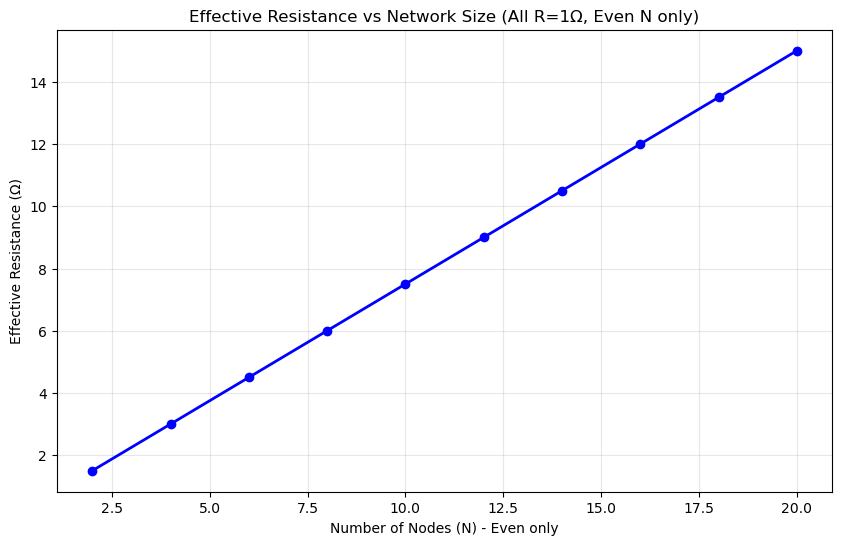

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def resistor_network(N, r1, r2, r3, r4):    
    G = np.zeros((N, N))
    
    for i in range(N):
        node_num = i + 1
        
        # Ground connection for the last node (V_N)
        if node_num == N: 
            G[i, i] += 1/r2
        
        # Horizontal connections (top resistors)
        if node_num > 1:  # Left connection
            G[i, i] += 1/r1
            G[i, i-1] -= 1/r1
        
        if node_num < N:  # Right connection  
            G[i, i] += 1/r1
            G[i, i+1] -= 1/r1
        
        # Diagonal connections (r3 and r4)
        if node_num % 2 == 1:  # Odd node
            if node_num < N:  # Connection to next even node (r3)
                G[i, i] += 1/r3
                G[i, i+1] -= 1/r3
                
        else:  # Even node
            if node_num > 1:  # Connection to previous odd node (r4)
                G[i, i] += 1/r4
                G[i, i-1] -= 1/r4
    
    # Create current vector: 1A into node 1, 0 for others
    I = np.zeros(N)
    I[0] = 1.0
    
    # Solve for node voltages
    V = np.linalg.solve(G, I)
    
    # Effective resistance = voltage at node 1 (since I=1A)
    return V[0]

# Test with increasing even N values only
N_values = range(2, 21, 2)  # Even numbers from 2 to 20
resistances = [resistor_network(N, 1, 1, 1, 1) for N in N_values]

# Create the comparison figure
plt.figure(figsize=(10, 6))
plt.plot(N_values, resistances, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Number of Nodes (N) - Even only')
plt.ylabel('Effective Resistance (Ω)')
plt.title('Effective Resistance vs Network Size (All R=1Ω, Even N only)')
plt.grid(True, alpha=0.3)

plt.savefig("Effective Resistance vs Network Size")

# Print results
print("Effective resistances for different network sizes (Even N only):")
for i, N in enumerate(N_values):
    print(f"N = {N:2d}: R_eff = {resistances[i]:.6f} Ω")